## Box–Muller transform

https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform

In [22]:
import numpy as np
import pandas as pd 
from scipy.stats import norm 
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

from utils.viz import viz 
viz.get_style()

### Introduction 

Sampling is one of the most important constructs when making probabilistic inferences. Sampling from a gaussian distribution is the essential step for all sampling. 

The Box-Muller transform is one technique that draws a sample from an arbitrary Gaussian distribution. The method is much faster than the standard inverse CDF method and the reject sampling, being accepted as the "standard" sampling algorithm for Gaussian distribution. 

The key euqations of BM method are: 

$$X =  \cos(2\pi u)\sqrt{-2\ln v}$$
$$Y =  \sin(2\pi u)\sqrt{-2\ln v}$$

In [9]:
def randn_bm(mu=0, sig=1, size=1):
    if size == 1:
        u = np.random.rand(size)
        v = np.random.rand(size)
    else:
        u = np.random.rand(size)
        v = np.random.rand(size)
    z = np.cos(2*np.pi*u)*np.sqrt(-2*np.log(v))
    return mu+z*sig

<AxesSubplot:xlabel='value', ylabel='Count'>

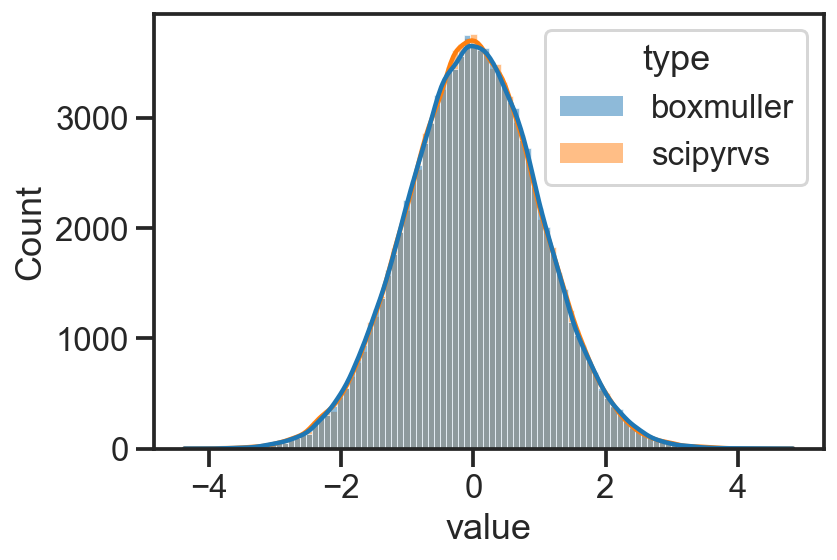

In [27]:
mu, sig, size = 0, 1, 100_000
for_plot = { 
    'value': np.hstack([randn_bm(0, 1, size=size), norm(0, 1).rvs(size)]),
    'type': ['boxmuller']*size + ['scipyrvs']*size
}
for_plot = pd.DataFrame.from_dict(for_plot)

sns.histplot(data=for_plot, x='value', bins=100, kde=True, hue="type")